In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city=pd.read_csv(city_data_to_load)
rides=pd.read_csv(ride_data_to_load)
city.head(),rides.head()
#city=cit.drop_duplicates('city', keep = 'first')
# Combine the data into a single dataset
pyber_data=pd.merge(rides,city,how="left",on='city')


# Display the data table for preview
pyber_data.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2018-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2018-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2018-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2018-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2018-03-09 06:26:29,42.81,5327642267789,33,Urban


In [3]:
#groupy by city
city_group=pyber_data.groupby(["city"])
#City Type

city_type=pyber_data.groupby(["city"])["type"].unique()
city_types=pd.DataFrame({"Type of City":city_type})
#Driver Count

city_drivers=city.groupby(["city"])['driver_count'].sum()
# ride counts
city_trips=city_group['ride_id'].count()
#Average Fare
city_Avg_fare=city_group['fare'].mean()



In [4]:
Pyber_Sum_data = pd.DataFrame({
    "Rides Count": city_trips,
    "Average Fare": city_Avg_fare,
    "Driver Count": city_drivers,
    "City Type":city_type
})

In [5]:
Pyber_Sum_data.head()

,Rides Count,Average Fare,Driver Count,City Type
city,,,,
Amandaburgh,18,24.641667,12,[Urban]
Barajasview,22,25.332273,26,[Urban]
Barronchester,16,36.422500,11,[Suburban]
Bethanyland,18,32.956111,22,[Suburban]
Bradshawfurt,10,40.064000,7,[Rural]


In [6]:
rural=Pyber_Sum_data[Pyber_Sum_data['City Type']=='Rural']
suburban=Pyber_Sum_data[Pyber_Sum_data['City Type']=='Suburban']
urban=Pyber_Sum_data[Pyber_Sum_data['City Type']=='Urban']


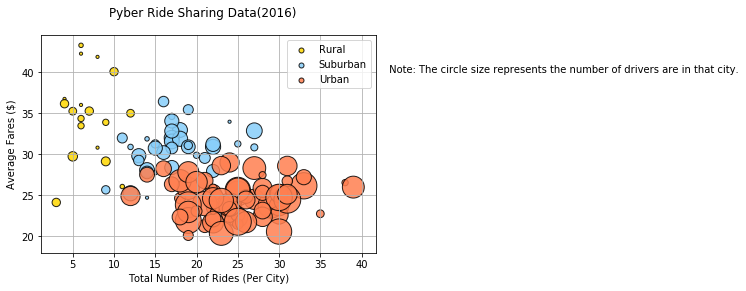

<Figure size 432x288 with 0 Axes>

In [7]:
plt.suptitle('Pyber Ride Sharing Data(2016)')
plt.scatter(rural['Rides Count'],rural['Average Fare'],s=rural['Driver Count']*10,alpha=0.85,c='gold',edgecolor = 'black', label = 'Rural')
plt.scatter(suburban['Rides Count'],suburban['Average Fare'],s=suburban['Driver Count']*10,alpha=0.85,c='lightskyblue',edgecolor = 'black', label = 'Suburban')
plt.scatter(urban['Rides Count'],urban['Average Fare'],s=urban['Driver Count']*10,alpha=0.85,c='coral',edgecolor = 'black', label = 'Urban')
plt.legend(["Urban","Rural", "Suburban"])
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fares ($)')
plt.text(43,40," Note: The circle size represents the number of drivers are in that city.")
lgnd = plt.legend()
lgnd.legendHandles[0]._sizes = [25]
lgnd.legendHandles[1]._sizes = [25]
lgnd.legendHandles[2]._sizes = [25]

plt.grid()
plt.show()

plt.savefig('Pyber Ride Sharing Data')

## Bubble Plot of Ride Sharing Data

## Total Fares by City Type

In [8]:
# Calculate Type Percents
pyber_city_price=pyber_data.groupby(["type"])['fare'].sum()
pyber_city_price=pyber_city_price.sort_values(ascending=False)
# Build Pie Chart
type_city = pyber_city_price.index

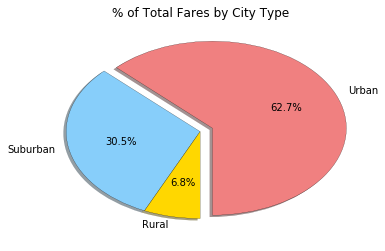

<Figure size 432x288 with 0 Axes>

In [9]:
colors=["lightcoral","lightskyblue","gold"]
explode=[0.1,0,0]
plt.pie(pyber_city_price,explode=explode,labels=type_city,colors=colors,autopct="%1.1f%%",shadow=True,wedgeprops = {'linewidth': .2, 'edgecolor': 'black'},startangle=270)
plt.title('% of Total Fares by City Type')
plt.show()
plt.savefig("Total Fare Price By City.png")

## Total Rides by City Type

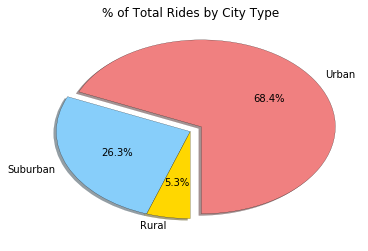

<Figure size 432x288 with 0 Axes>

In [10]:
# Calculate Type Percents
pyber_city_rides=pyber_data.groupby(["type"])['ride_id'].count()
pyber_city_rides=pyber_city_rides.sort_values(ascending=False)
# Build Pie Chart
type_city = pyber_city_rides.index
colors=["lightcoral","lightskyblue","gold"]
explode=[0.1,0,0]
plt.pie(pyber_city_rides,explode=explode,labels=type_city,colors=colors,autopct="%1.1f%%",shadow=True,wedgeprops = {'linewidth': .2, 'edgecolor': 'black'},startangle=270)
plt.title('% of Total Rides by City Type')
plt.show()
# Save Figure
plt.savefig("Total Fare Rides By City.png")

## Total Drivers by City Type

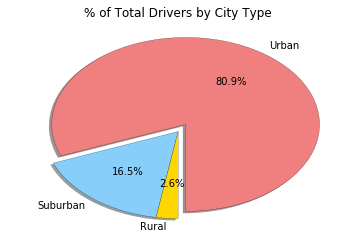

<Figure size 432x288 with 0 Axes>

In [11]:
# Calculate Type Percents
pyber_city_drivers=city.groupby(["type"])['driver_count'].sum()
pyber_city_drivers=pyber_city_drivers.sort_values(ascending=False)
# Build Pie Chart
type_city = pyber_city_drivers.index
colors=["lightcoral","lightskyblue","gold"]
explode=[0.1,0,0]
plt.pie(pyber_city_drivers,explode=explode,labels=type_city,colors=colors,autopct="%1.1f%%",shadow=True,wedgeprops = {'linewidth': .2, 'edgecolor': 'black'},startangle=270)
plt.title('% of Total Drivers by City Type')
plt.show()
# Save Figure
plt.savefig("Total Drivers By City.png")


Average fares in the rural areas tends to be higher than the average fares in the Suburban Areas which is also higher than the average fare prices in the urban cities. Despite a higher average prices,  the rural areas has the least number of rides and drivers.

The urban cities even though have relative lower average cost, dominates in number of rides. This may be due to the fact the most people living in urban areas rely on public transportation and also travel relatively shorter distances.
The suburban cities have a relatively higher volume in number of rides, as well as relatively higher average fares. Pyber should focus more on recruiting more drivers in the suburban cities if some of their service calls are going unanswered. They should also direct more marketing resources to the suburban cities
